# NBA Archetypes

## Initialization

In [504]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, silhouette_score, f1_score
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
import plotly.express as px

## Load Data

In [507]:
# Load data function
def load_data(file_name, local_path, server_path, encoding='utf-8', sep=','):
    try:
        data = pd.read_csv(local_path + file_name, encoding=encoding, sep=';')
        print(f"'{file_name}' file successfully read from the local path.")

    except (FileNotFoundError, UnicodeDecodeError):
        try:
            data = pd.read_csv(server_path + file_name, encoding=encoding, sep=';')
            print(f"'{file_name}' file successfully read from the server path.")

        except FileNotFoundError:
            print(f"'{file_name}' file not found. Please check the file paths.")
            data = None

        except UnicodeDecodeError:
            print(f"Encoding error encountered while reading '{file_name}' from the server path.")
            data = None
            
    return data

file_name = '2023-2024 NBA Player Stats - Regular.csv'
local_path = '/Users/ericmacdougall/Downloads/NBA-Archetypes-main/datasets/'
server_path = '/datasets/'

df = load_data(file_name, local_path, server_path, encoding='ISO-8859-1', sep=';')

'2023-2024 NBA Player Stats - Regular.csv' file successfully read from the local path.


## Data Preprocessing

In [510]:
# Analyze function
def analyze(data):
    # Display the DataFrame
    display(data)

    # Print DataFrame Info
    print("DATAFRAME INFO:")
    data.info()
    print()

    # Calculate Percentage of Null Values
    print("PERCENTAGE OF NULL VALUES:")
    print((data.isnull().sum()/len(data)) * 100)
    print()

    # Calculate Number of Duplicated Rows
    print("NUMBER OF DUPLICATED ROWS:", data.duplicated().sum())

In [512]:
analyze(df)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,568,Thaddeus Young,PF,35,PHO,10,0,8.9,1.1,2.1,...,0.333,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3
731,569,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,...,0.855,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7
732,570,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,...,0.679,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6
733,571,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,...,0.605,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8


DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      735 non-null    int64  
 1   Player  735 non-null    object 
 2   Pos     735 non-null    object 
 3   Age     735 non-null    int64  
 4   Tm      735 non-null    object 
 5   G       735 non-null    int64  
 6   GS      735 non-null    int64  
 7   MP      735 non-null    float64
 8   FG      735 non-null    float64
 9   FGA     735 non-null    float64
 10  FG%     735 non-null    float64
 11  3P      735 non-null    float64
 12  3PA     735 non-null    float64
 13  3P%     735 non-null    float64
 14  2P      735 non-null    float64
 15  2PA     735 non-null    float64
 16  2P%     735 non-null    float64
 17  eFG%    735 non-null    float64
 18  FT      735 non-null    float64
 19  FTA     735 non-null    float64
 20  FT%     735 non-null    float64
 21  ORB     735 non-null   

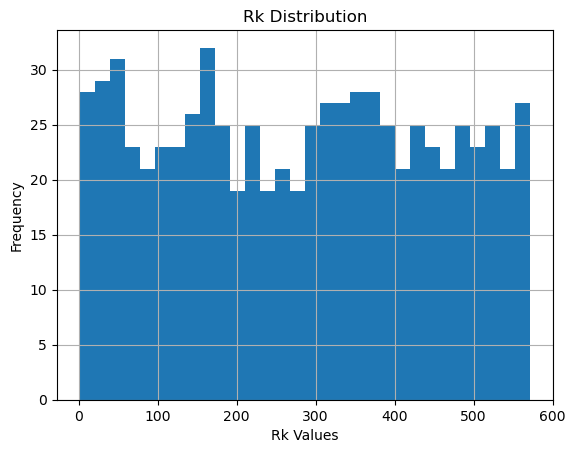

<Figure size 1000x600 with 0 Axes>

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 154 (\x9a) missing from current font.

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 138 (\x8a) missing from current font.



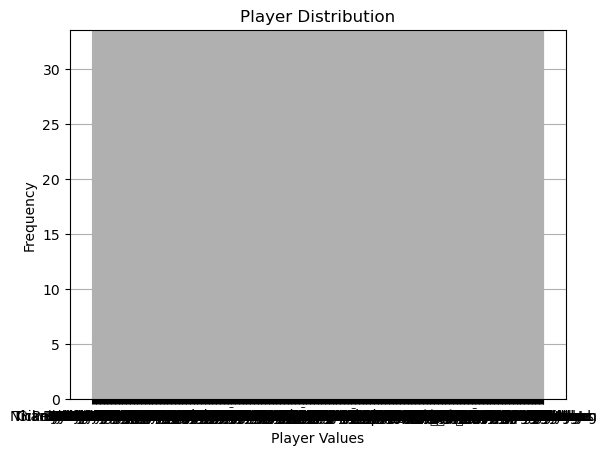

<Figure size 1000x600 with 0 Axes>

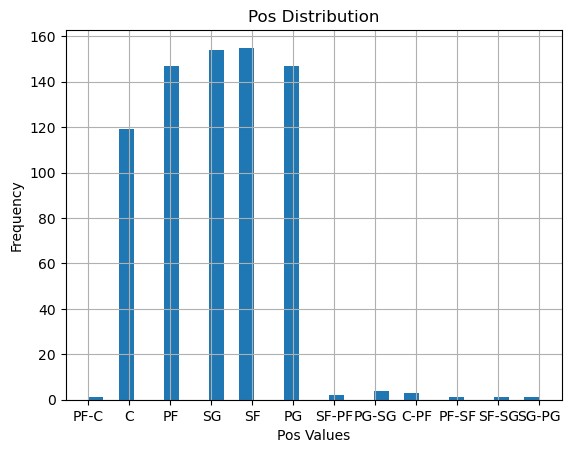

<Figure size 1000x600 with 0 Axes>

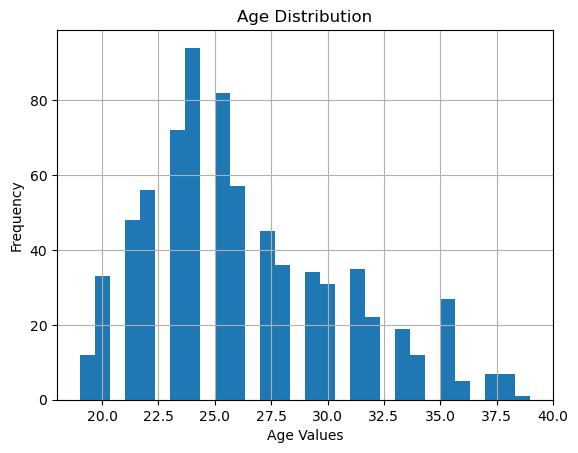

<Figure size 1000x600 with 0 Axes>

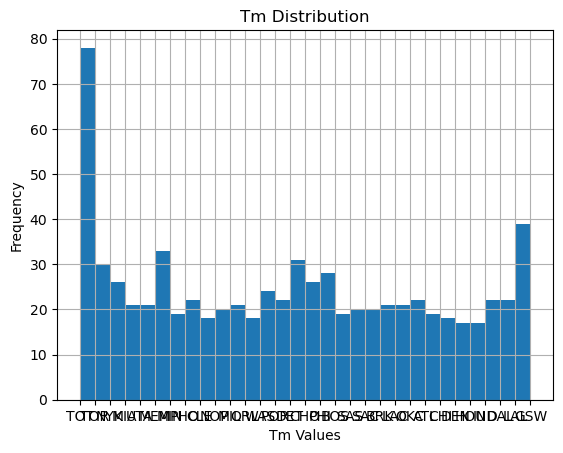

<Figure size 1000x600 with 0 Axes>

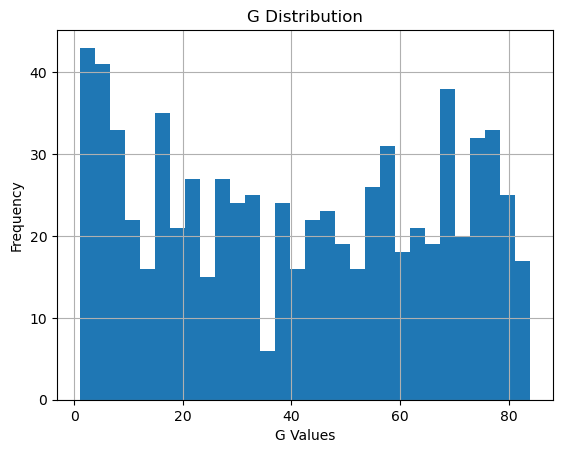

<Figure size 1000x600 with 0 Axes>

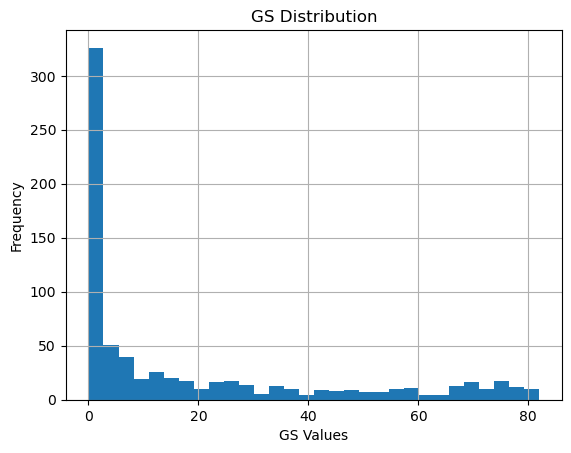

<Figure size 1000x600 with 0 Axes>

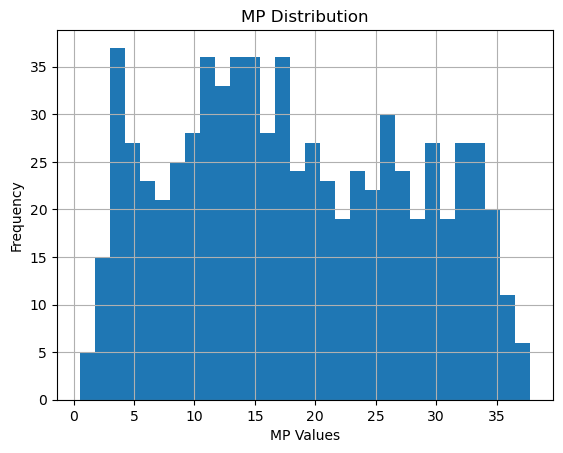

<Figure size 1000x600 with 0 Axes>

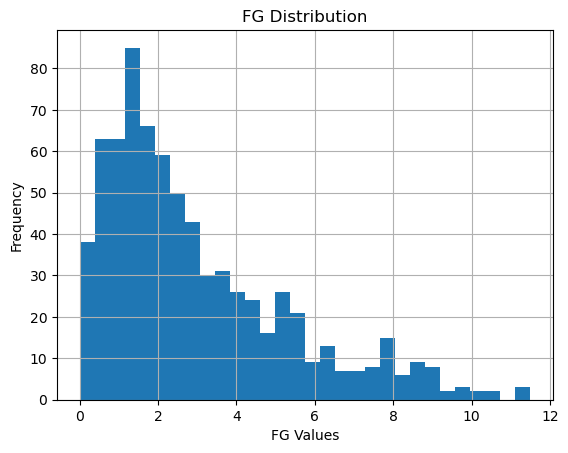

<Figure size 1000x600 with 0 Axes>

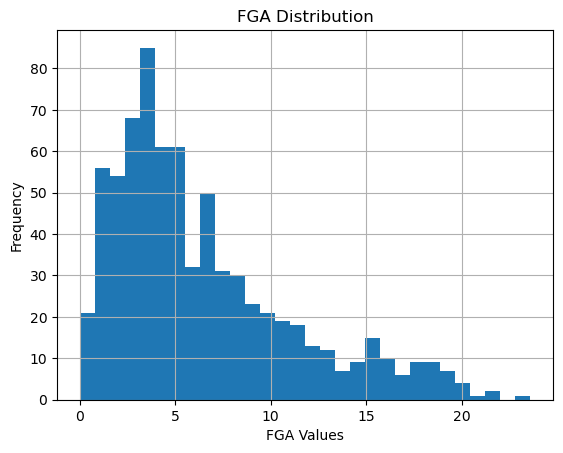

<Figure size 1000x600 with 0 Axes>

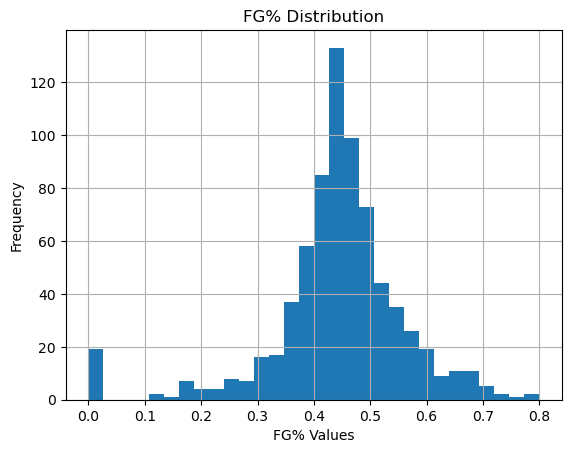

<Figure size 1000x600 with 0 Axes>

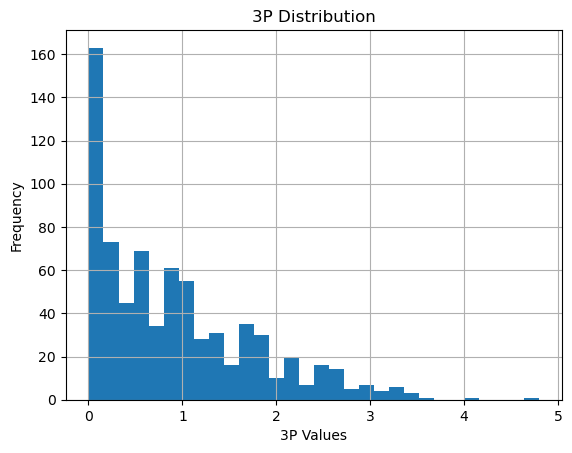

<Figure size 1000x600 with 0 Axes>

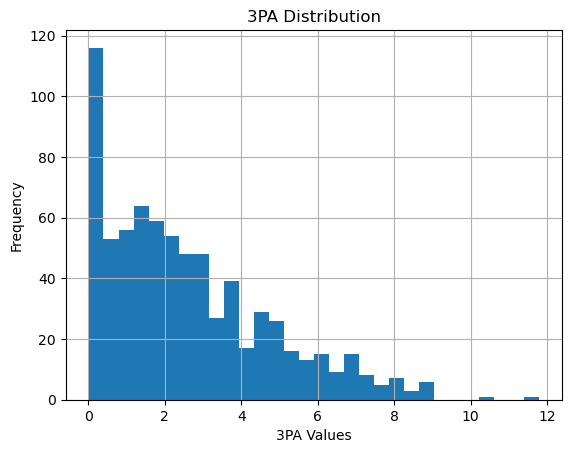

<Figure size 1000x600 with 0 Axes>

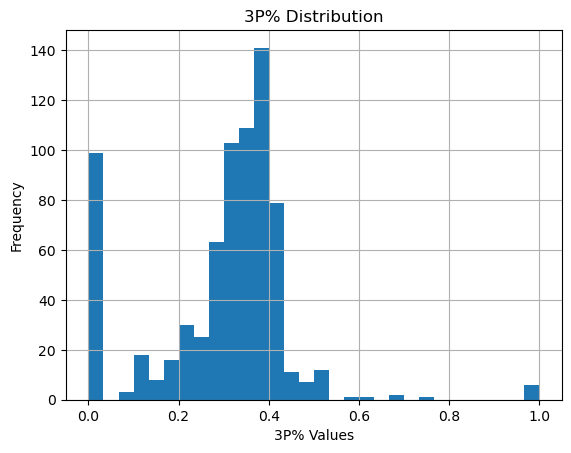

<Figure size 1000x600 with 0 Axes>

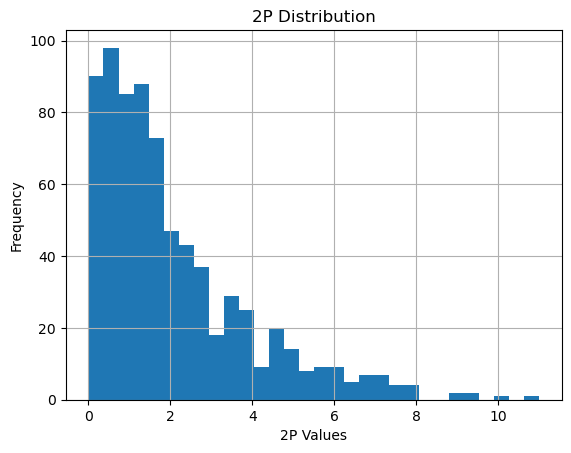

<Figure size 1000x600 with 0 Axes>

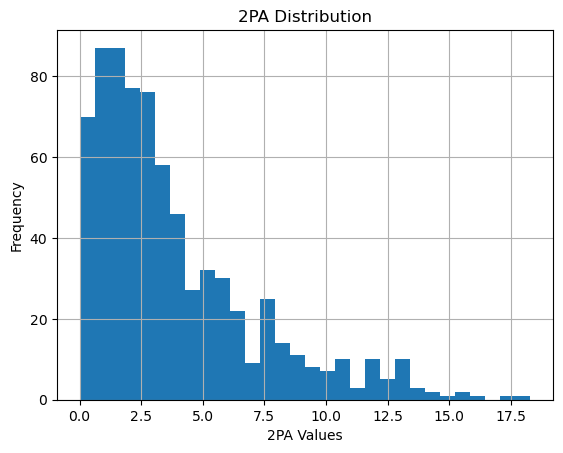

<Figure size 1000x600 with 0 Axes>

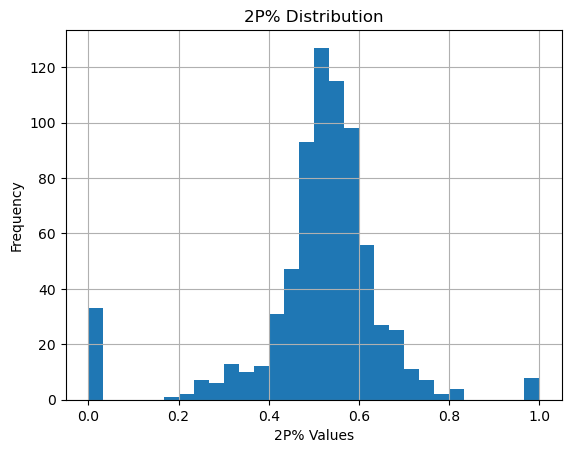

<Figure size 1000x600 with 0 Axes>

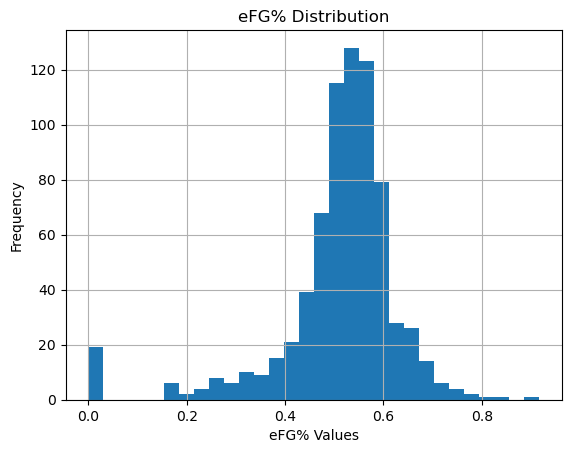

<Figure size 1000x600 with 0 Axes>

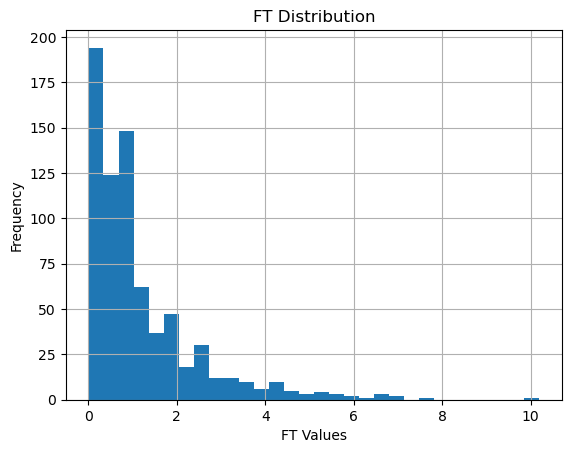

<Figure size 1000x600 with 0 Axes>

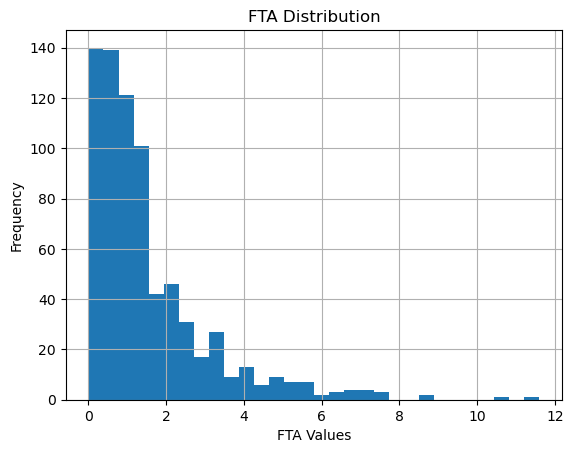

<Figure size 1000x600 with 0 Axes>

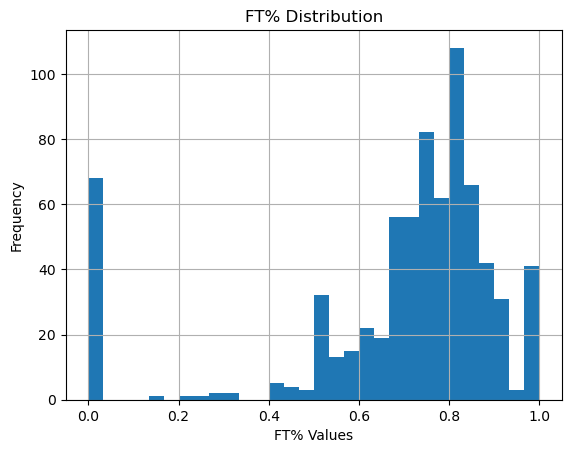

<Figure size 1000x600 with 0 Axes>

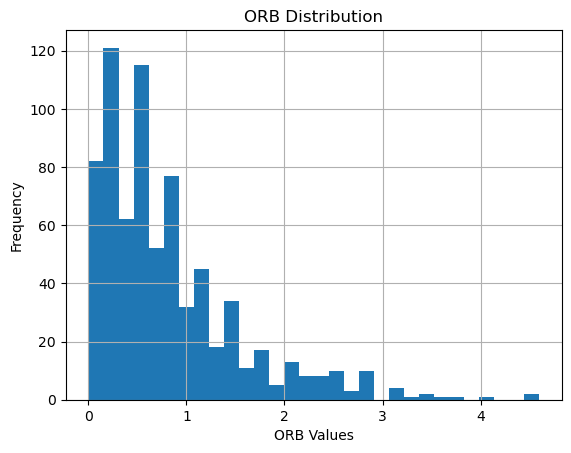

<Figure size 1000x600 with 0 Axes>

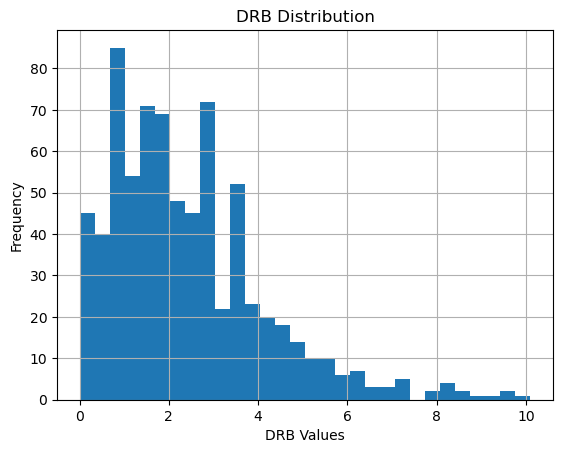

<Figure size 1000x600 with 0 Axes>

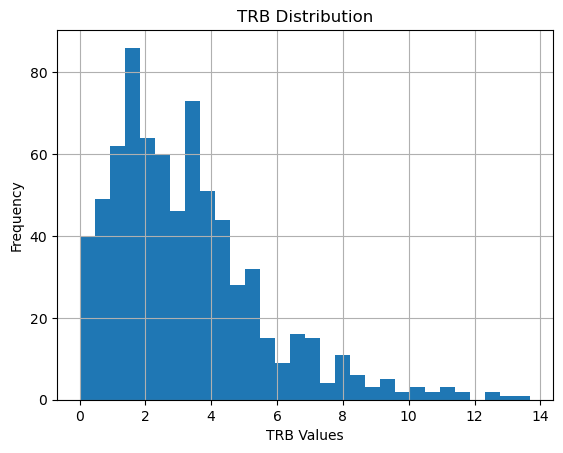

<Figure size 1000x600 with 0 Axes>

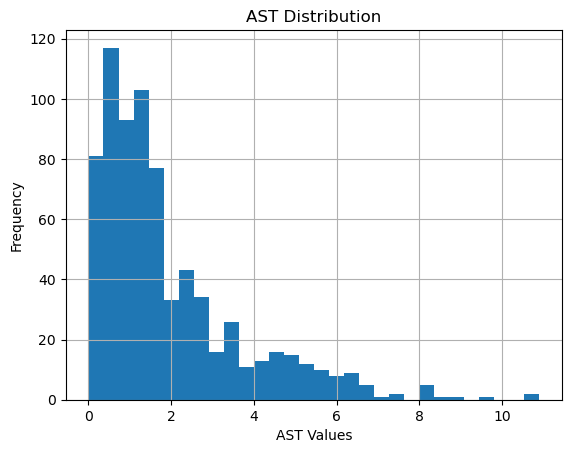

<Figure size 1000x600 with 0 Axes>

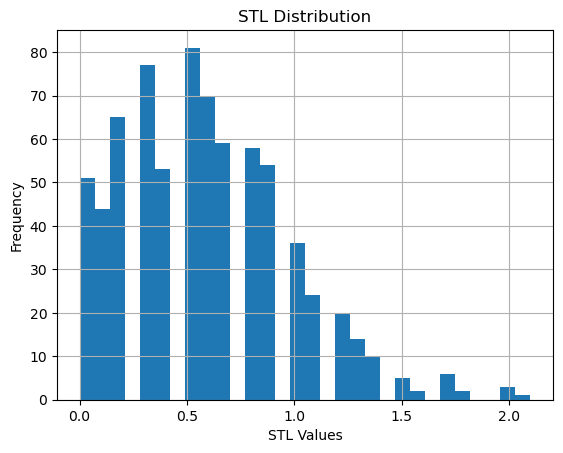

<Figure size 1000x600 with 0 Axes>

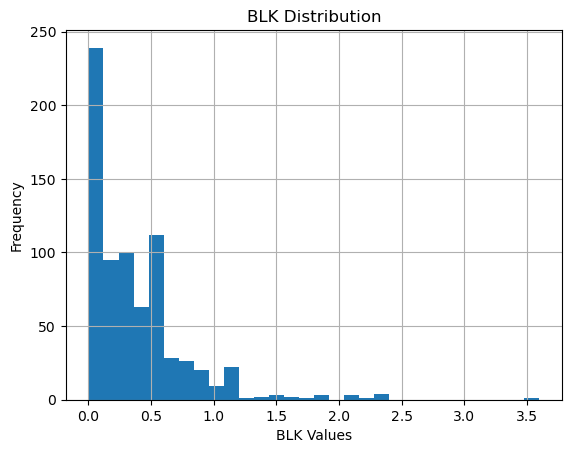

<Figure size 1000x600 with 0 Axes>

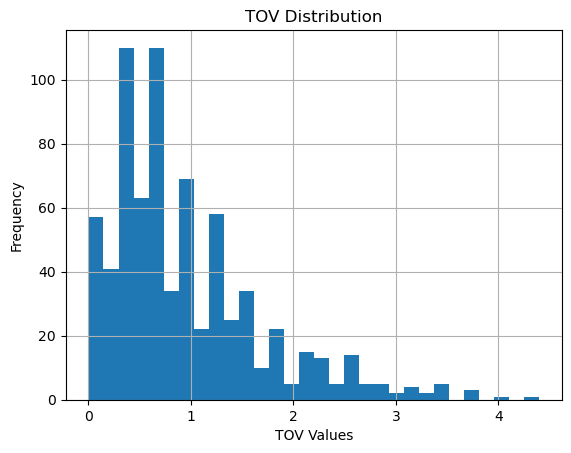

<Figure size 1000x600 with 0 Axes>

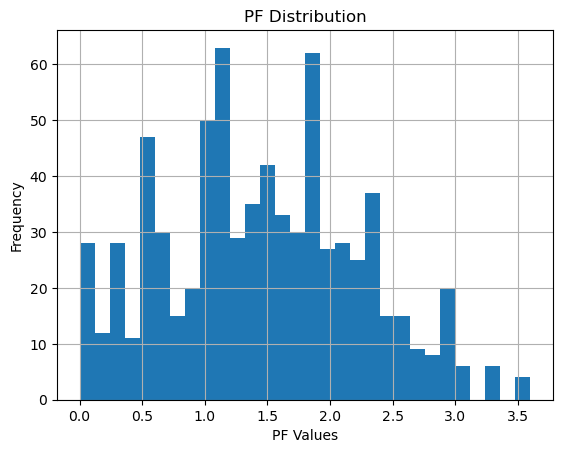

<Figure size 1000x600 with 0 Axes>

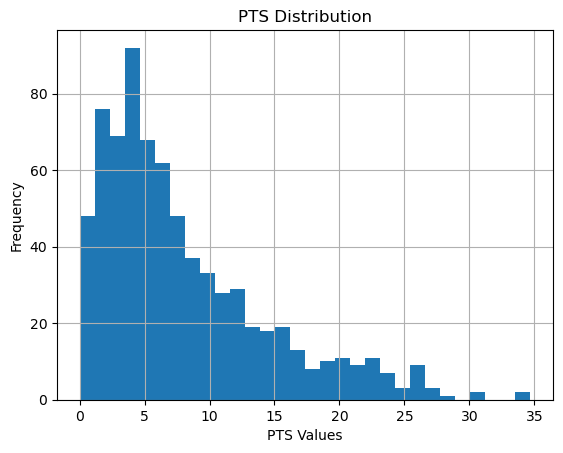

<Figure size 1000x600 with 0 Axes>

In [514]:
for col in df.columns:
    df[col].hist(bins=30)
    plt.ylabel('Frequency')
    plt.xlabel(f'{col} Values')
    plt.title(f'{col} Distribution')
    plt.figure(figsize=(10, 6))  # Optional: adjust figure size
    plt.tight_layout()
    plt.show()

In [515]:
from pyod.models.knn import KNN
from sklearn.ensemble import IsolationForest

data = df.copy()
data = data.drop(columns=['Player', 'Tm', 'Pos'])

model = KNN()
estimation_knn = model.fit_predict(data) == 1 
outliers_knn = (estimation_knn).sum()
print('Number of anomalies (KNN): ', outliers_knn)

model = IsolationForest(n_estimators=100)
estimation_iforest = model.fit_predict(data) == -1
outliers_iforest = estimation_iforest.sum()
print('Number of anomalies (isolation forest): ', outliers_iforest)

print('Matched: ', (estimation_knn & estimation_iforest).sum())

df_clean = df.copy()
mask = ~(estimation_knn & estimation_iforest)
df_clean = df[mask]

df_clean.info()
df = df_clean.copy()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function fit_predict is deprecated



Number of anomalies (KNN):  74
Number of anomalies (isolation forest):  105
Matched:  29
<class 'pandas.core.frame.DataFrame'>
Index: 706 entries, 0 to 733
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      706 non-null    int64  
 1   Player  706 non-null    object 
 2   Pos     706 non-null    object 
 3   Age     706 non-null    int64  
 4   Tm      706 non-null    object 
 5   G       706 non-null    int64  
 6   GS      706 non-null    int64  
 7   MP      706 non-null    float64
 8   FG      706 non-null    float64
 9   FGA     706 non-null    float64
 10  FG%     706 non-null    float64
 11  3P      706 non-null    float64
 12  3PA     706 non-null    float64
 13  3P%     706 non-null    float64
 14  2P      706 non-null    float64
 15  2PA     706 non-null    float64
 16  2P%     706 non-null    float64
 17  eFG%    706 non-null    float64
 18  FT      706 non-null    float64
 19  FTA     706 non-null    float

In [516]:
# Define the mapping of current column names to full names
column_mapping = {
    'Rk': 'Rank',
    'Player': 'Player Name',
    'Pos': 'Position',
    'Age': 'Age',
    'Tm': 'Team',
    'G': 'Games Played',
    'GS': 'Games Started',
    'MP': 'Minutes Per Game',
    'FG': 'Field Goals Made',
    'FGA': 'Field Goals Attempted',
    'FG%': 'Field Goal Percentage',
    '3P': 'Three-Point Field Goals Made',
    '3PA': 'Three-Point Field Goals Attempted',
    '3P%': 'Three-Point Field Goal Percentage',
    '2P': 'Two-Point Field Goals Made',
    '2PA': 'Two-Point Field Goals Attempted',
    '2P%': 'Two-Point Field Goal Percentage',
    'eFG%': 'Effective Field Goal Percentage',
    'FT': 'Free Throws Made',
    'FTA': 'Free Throws Attempted',
    'FT%': 'Free Throw Percentage',
    'ORB': 'Offensive Rebounds',
    'DRB': 'Defensive Rebounds',
    'TRB': 'Total Rebounds',
    'AST': 'Assists',
    'STL': 'Steals',
    'BLK': 'Blocks',
    'TOV': 'Turnovers',
    'PF': 'Personal Fouls',
    'PTS': 'Points'
}

# Rename the columns using the mapping
df.rename(columns=column_mapping, inplace=True)

In [517]:
df = df.drop(columns=['Age', 
                      'Rank', 
                      'Position', 
                      'Team',
                      'Games Played',
                      'Games Started',
                      'Field Goal Percentage',
                      'Three-Point Field Goal Percentage', 
                      'Two-Point Field Goal Percentage', 
                      'Effective Field Goal Percentage',
                      'Free Throw Percentage', 
                      'Total Rebounds'
                      ])

1) Rank ('Rk'): This is just an identifier of player rank and does not represent a player's performance, so it does not contribute to clustering.
2) Player Name ('Player'): This is also an identifier, not a numeric or performance-related feature.
3) Age ('Age'): While age can influence a player's style, it may not directly contribute to player archetypes like playing style or efficiency. If you want to account for experience or prime age, you could consider including it.
4) Team ('Tm'): Teams influence player performance but may not help identify archetypes unless you want to include team-based playing styles. You can drop this feature unless team context is crucial for the clustering.
5) Games Played ('G'): If the dataset already has a substantial number of games for each player, this might be redundant, as you may already have performance metrics (e.g., minutes played, points) that reflect their impact on the court.
6) Games Started ('GS'): Similar to 'Games Played,' this feature may not add unique information when compared to other features like 'Minutes Per Game' or 'Points'.
7) Field Goal Percentage ('FG%') and Effective Field Goal Percentage ('eFG%'): If you're using other shooting stats like 'Field Goals Made', '3P%', and '2P%', you might not need these, as they can be highly correlated.

In [519]:
aggregated_df = df.groupby('Player Name').agg({
    #'Age': 'first',  # Use the first occurrence of age, assuming age doesn’t change within a season
    #'Games Played': 'sum',  # Total games played
    #'Games Started': 'sum',  # Total games started
    'Minutes Per Game': 'sum',  # Total minutes played
    'Field Goals Made': 'sum',  # Total field goals made
    'Field Goals Attempted': 'sum',  # Total field goals attempted
    #'Field Goal Percentage': 'mean',
    'Three-Point Field Goals Made': 'sum',  # Total three-pointers made
    'Three-Point Field Goals Attempted': 'sum',  # Total three-point attempts
    #'Three-Point Field Goal Percentage': 'mean',
    'Two-Point Field Goals Made': 'sum',  # Total two-pointers made
    'Two-Point Field Goals Attempted': 'sum',  # Total two-point attempts
    #'Two-Point Field Goal Percentage': 'mean',
    #'Effective Field Goal Percentage': 'mean',
    'Free Throws Made': 'sum',  # Total free throws made
    'Free Throws Attempted': 'sum',  # Total free throw attempts
    #'Free Throw Percentage': 'mean',
    'Offensive Rebounds': 'sum',  # Total offensive rebounds
    'Defensive Rebounds': 'sum',  # Total defensive rebounds
    #'Total Rebounds': 'sum',  # Total rebounds
    'Assists': 'sum',  # Total assists
    'Steals': 'sum',  # Total steals
    'Blocks': 'sum',  # Total blocks
    'Turnovers': 'sum',  # Total turnovers
    'Personal Fouls': 'sum',  # Total personal fouls
    'Points': 'sum'   # Total points scored
}).reset_index()

# Verify the aggregated data
analyze(aggregated_df)

,Player Name,Minutes Per Game,Field Goals Made,Field Goals Attempted,Three-Point Field Goals Made,Three-Point Field Goals Attempted,Two-Point Field Goals Made,Two-Point Field Goals Attempted,Free Throws Made,Free Throws Attempted,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points
0,A.J. Green,11.0,1.5,3.5,1.2,3.0,0.3,0.5,0.3,0.3,0.2,1.0,0.5,0.2,0.1,0.2,0.9,4.5
1,A.J. Lawson,7.4,1.3,2.9,0.3,1.2,1.0,1.7,0.4,0.5,0.3,0.9,0.5,0.2,0.1,0.3,0.5,3.2
2,AJ Griffin,8.6,0.9,3.1,0.5,2.0,0.4,1.2,0.1,0.1,0.1,0.8,0.3,0.1,0.1,0.4,0.3,2.4
3,Aaron Gordon,31.5,5.5,9.8,0.5,1.9,4.9,7.9,2.4,3.7,2.4,4.1,3.5,0.8,0.6,1.4,1.9,13.9
4,Aaron Holiday,16.3,2.4,5.3,1.1,2.8,1.3,2.6,0.7,0.8,0.3,1.3,1.8,0.5,0.1,0.7,1.6,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,Zach LaVine,34.9,6.8,15.0,2.4,6.8,4.4,8.3,3.5,4.1,0.3,4.8,3.9,0.8,0.3,2.1,2.3,19.5
540,Zavier Simpson,23.0,2.4,7.7,0.7,2.4,1.7,5.3,0.4,0.6,0.6,2.3,3.6,1.0,0.4,1.4,1.6,6.0
541,Zeke Nnaji,9.9,1.2,2.6,0.1,0.4,1.1,2.2,0.7,1.1,1.1,1.1,0.6,0.3,0.7,0.5,1.4,3.2
542,Ziaire Williams,20.4,2.9,7.4,1.1,3.7,1.8,3.7,1.2,1.5,0.7,2.8,1.5,0.7,0.2,1.3,1.7,8.2


DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Player Name                        544 non-null    object 
 1   Minutes Per Game                   544 non-null    float64
 2   Field Goals Made                   544 non-null    float64
 3   Field Goals Attempted              544 non-null    float64
 4   Three-Point Field Goals Made       544 non-null    float64
 5   Three-Point Field Goals Attempted  544 non-null    float64
 6   Two-Point Field Goals Made         544 non-null    float64
 7   Two-Point Field Goals Attempted    544 non-null    float64
 8   Free Throws Made                   544 non-null    float64
 9   Free Throws Attempted              544 non-null    float64
 10  Offensive Rebounds                 544 non-null    float64
 11  Defensive Rebounds                 544 non

In [520]:
display(aggregated_df.head(30))

,Player Name,Minutes Per Game,Field Goals Made,Field Goals Attempted,Three-Point Field Goals Made,Three-Point Field Goals Attempted,Two-Point Field Goals Made,Two-Point Field Goals Attempted,Free Throws Made,Free Throws Attempted,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points
0,A.J. Green,11.0,1.5,3.5,1.2,3.0,0.3,0.5,0.3,0.3,0.2,1.0,0.5,0.2,0.1,0.2,0.9,4.5
1,A.J. Lawson,7.4,1.3,2.9,0.3,1.2,1.0,1.7,0.4,0.5,0.3,0.9,0.5,0.2,0.1,0.3,0.5,3.2
2,AJ Griffin,8.6,0.9,3.1,0.5,2.0,0.4,1.2,0.1,0.1,0.1,0.8,0.3,0.1,0.1,0.4,0.3,2.4
3,Aaron Gordon,31.5,5.5,9.8,0.5,1.9,4.9,7.9,2.4,3.7,2.4,4.1,3.5,0.8,0.6,1.4,1.9,13.9
4,Aaron Holiday,16.3,2.4,5.3,1.1,2.8,1.3,2.6,0.7,0.8,0.3,1.3,1.8,0.5,0.1,0.7,1.6,6.6
5,Aaron Nesmith,27.7,4.4,8.8,1.9,4.6,2.4,4.2,1.5,1.9,0.9,2.9,1.5,0.9,0.7,0.9,3.3,12.2
6,Aaron Wiggins,15.7,2.7,4.8,0.8,1.6,1.9,3.2,0.7,0.9,0.8,1.6,1.1,0.7,0.2,0.7,1.2,6.9
7,Adam Flagler,7.0,0.5,3.5,0.5,3.0,0.0,0.5,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.5
8,Adama Sanogo,7.3,1.6,3.0,0.0,0.0,1.6,3.0,0.9,1.3,2.1,1.9,0.0,0.1,0.0,0.6,0.6,4.0
9,Admiral Schofield,3.7,0.4,1.1,0.3,0.7,0.2,0.4,0.0,0.1,0.1,0.6,0.3,0.0,0.0,0.2,0.4,1.1


### Code

In [522]:
names = aggregated_df['Player Name']
aggregated_df = aggregated_df.drop(columns='Player Name')

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the DataFrame
scaled_df = pd.DataFrame(scaler.fit_transform(aggregated_df), columns=aggregated_df.columns)
analyze(scaled_df)

,Minutes Per Game,Field Goals Made,Field Goals Attempted,Three-Point Field Goals Made,Three-Point Field Goals Attempted,Two-Point Field Goals Made,Two-Point Field Goals Attempted,Free Throws Made,Free Throws Attempted,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points
0,-0.690750,-0.648957,-0.634850,0.036729,-0.087118,-0.877510,-0.913641,-0.682982,-0.756342,-0.806889,-0.802027,-0.742816,-0.830783,-0.718389,-0.905395,-0.680025,-0.590866
1,-0.898264,-0.710114,-0.721035,-0.691303,-0.635710,-0.593895,-0.648386,-0.619838,-0.654472,-0.706810,-0.843067,-0.742816,-0.830783,-0.718389,-0.810385,-0.969261,-0.736436
2,-0.829092,-0.832430,-0.692306,-0.529518,-0.391891,-0.836994,-0.758909,-0.809271,-0.858211,-0.906968,-0.884108,-0.823001,-0.984715,-0.718389,-0.715374,-1.113879,-0.826018
3,0.490928,0.574196,0.270094,-0.529518,-0.422368,0.986249,0.722095,0.643053,0.975435,1.394855,0.470232,0.459958,0.092812,0.251829,0.234732,0.043066,0.461721
4,-0.385243,-0.373747,-0.376294,-0.044164,-0.148073,-0.472345,-0.449445,-0.430404,-0.501669,-0.706810,-0.678905,-0.221614,-0.368985,-0.718389,-0.430342,-0.173861,-0.355713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,0.686914,0.971721,1.017032,1.007438,1.071020,0.783667,0.810513,1.337642,1.179174,-0.706810,0.757516,0.620328,0.092812,-0.330302,0.899806,0.332303,1.088794
540,0.000964,-0.373747,-0.031554,-0.367733,-0.269982,-0.310279,0.147377,-0.619838,-0.603538,-0.406572,-0.268499,0.500050,0.400677,-0.136259,0.234732,-0.173861,-0.422900
541,-0.754157,-0.740693,-0.764127,-0.853088,-0.879528,-0.553378,-0.537864,-0.430404,-0.348865,0.093824,-0.760986,-0.702724,-0.676850,0.445872,-0.620363,-0.318479,-0.736436
542,-0.148907,-0.220853,-0.074646,-0.044164,0.126223,-0.269763,-0.206296,-0.114682,-0.145126,-0.306493,-0.063296,-0.341891,-0.061120,-0.524346,0.139722,-0.101552,-0.176550


DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Minutes Per Game                   544 non-null    float64
 1   Field Goals Made                   544 non-null    float64
 2   Field Goals Attempted              544 non-null    float64
 3   Three-Point Field Goals Made       544 non-null    float64
 4   Three-Point Field Goals Attempted  544 non-null    float64
 5   Two-Point Field Goals Made         544 non-null    float64
 6   Two-Point Field Goals Attempted    544 non-null    float64
 7   Free Throws Made                   544 non-null    float64
 8   Free Throws Attempted              544 non-null    float64
 9   Offensive Rebounds                 544 non-null    float64
 10  Defensive Rebounds                 544 non-null    float64
 11  Assists                            544 non

## EDA

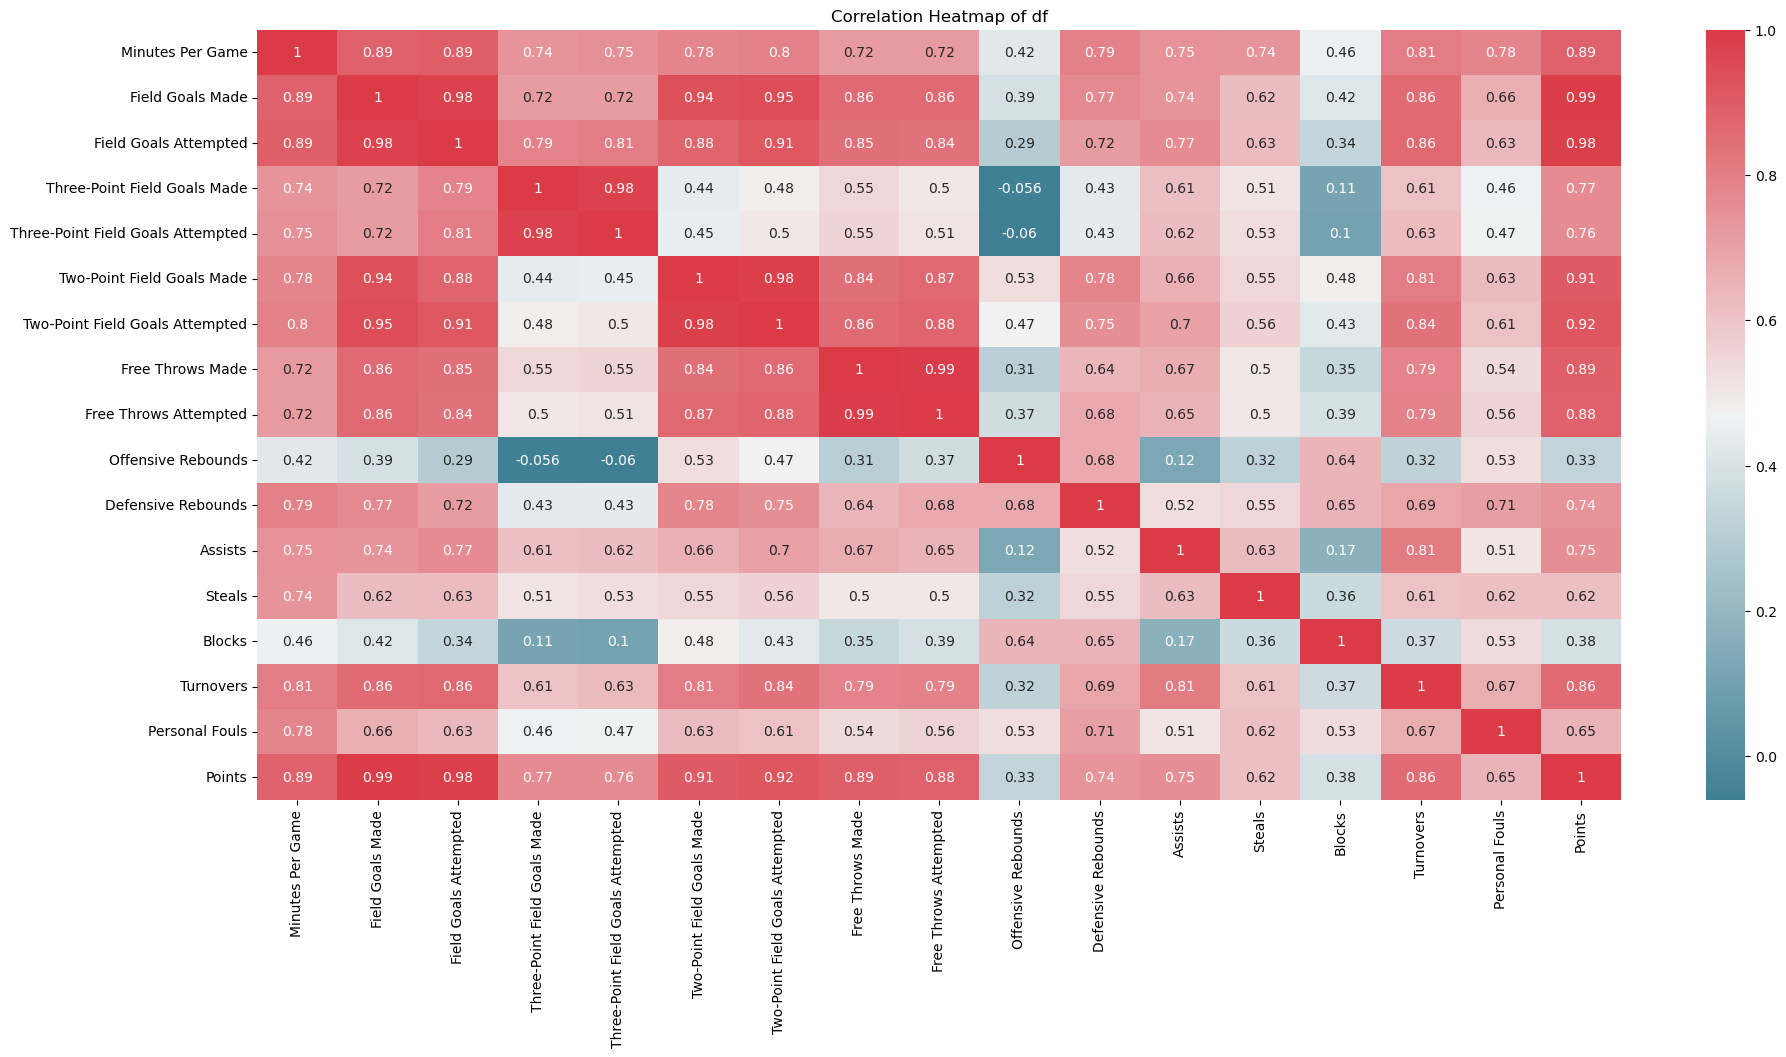

In [524]:
numerical_columns = df.select_dtypes(include=[np.number])
corr = numerical_columns.corr()
plt.figure(figsize=(22, 10))
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True)
plt.title(label='Correlation Heatmap of df')
plt.show()

## PCA

- Original data had 30 features
- Used principal component analysis to reduce that down to 6 components
- Chose 6 because it retained 96% of the information but still significantly reduced down dimensions
- Reataining 95% of the information was the goal

For n_components = 2, explained variance ratio is 0.8357524434650834
For n_components = 3, explained variance ratio is 0.9003091410425403
For n_components = 4, explained variance ratio is 0.9280693322161496
For n_components = 5, explained variance ratio is 0.9461238653499653
For n_components = 6, explained variance ratio is 0.9603507572667558
For n_components = 7, explained variance ratio is 0.973925348998016
For n_components = 8, explained variance ratio is 0.9831800500765381
For n_components = 9, explained variance ratio is 0.9896628397376905
For n_components = 10, explained variance ratio is 0.9952816446994767
For n_components = 11, explained variance ratio is 0.9976404601477774
For n_components = 12, explained variance ratio is 0.9990463380914081
For n_components = 13, explained variance ratio is 0.9996123489237416
For n_components = 14, explained variance ratio is 0.999984024992095
For n_components = 15, explained variance ratio is 0.9999951949852603
For n_components = 16, explain

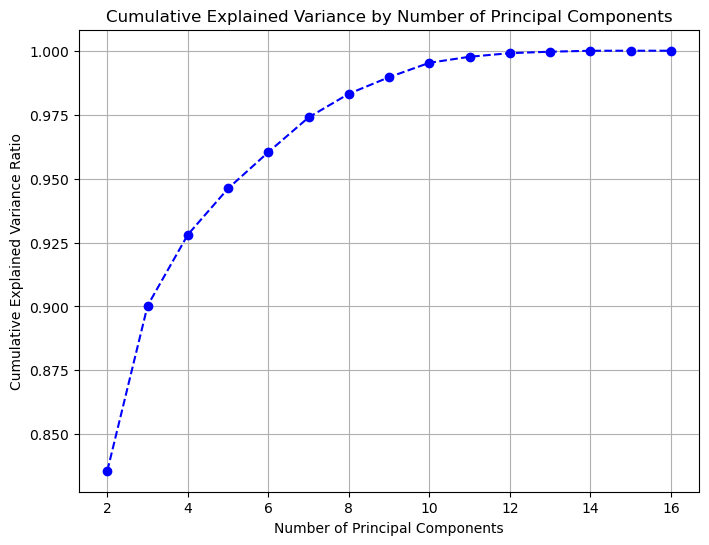

In [526]:
variance_list = []

for n_components in range(2,17):
    pca = PCA(n_components=n_components)
    components = pca.fit_transform(scaled_df)
    variance = sum(pca.explained_variance_ratio_)
    variance_list.append(variance)
    print("For n_components = {}, explained variance ratio is {}".format(n_components, variance))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 17), variance_list, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

For n_clusters = 2, silhouette score is 0.514941
For n_clusters = 3, silhouette score is 0.449825
For n_clusters = 4, silhouette score is 0.336324
For n_clusters = 5, silhouette score is 0.324660
For n_clusters = 6, silhouette score is 0.337135
For n_clusters = 7, silhouette score is 0.287071
For n_clusters = 8, silhouette score is 0.274287
For n_clusters = 9, silhouette score is 0.264658
For n_clusters = 10, silhouette score is 0.271211
For n_clusters = 11, silhouette score is 0.252980
For n_clusters = 12, silhouette score is 0.258955
For n_clusters = 13, silhouette score is 0.253340
For n_clusters = 14, silhouette score is 0.259347
For n_clusters = 15, silhouette score is 0.205977


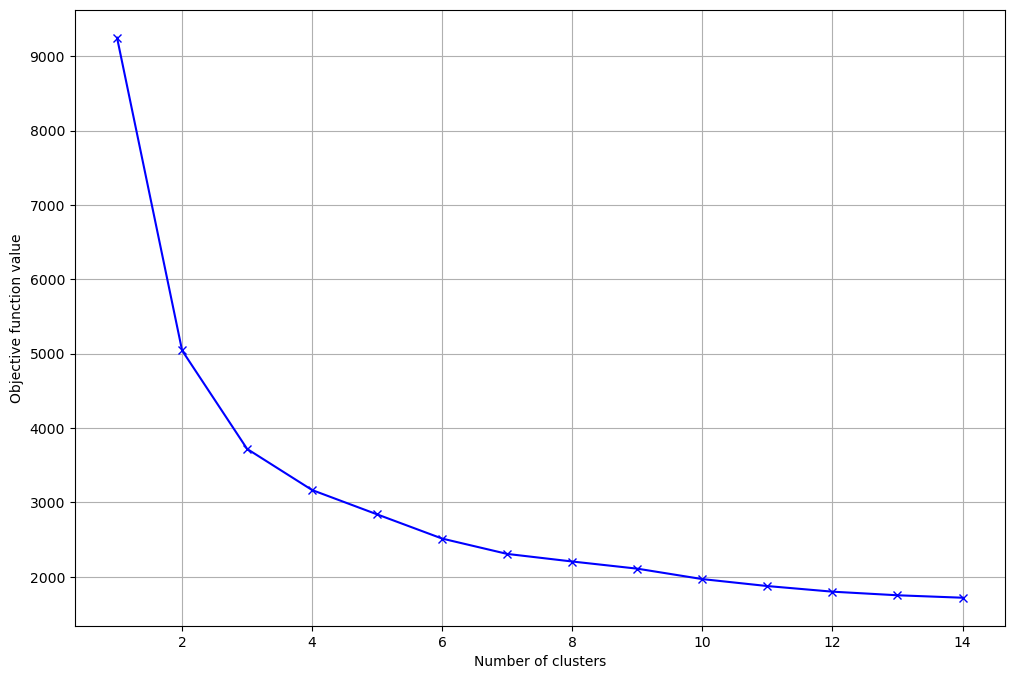

In [527]:
# Perform PCA to reduce data to 6 components
pca_6 = PCA(n_components=6)
components_6 = pca_6.fit_transform(scaled_df)

# Initialize a list to store silhouette scores
silhouette_scores = []

# Range for the number of clusters
K = range(2, 16)  # Start from 2 because silhouette score is undefined for 1 cluster

# Calculate silhouette score for each value of K
for k in K:
    model = KMeans(n_clusters=k, random_state=12345)
    model.fit(components_6)
    score = silhouette_score(components_6, model.labels_)
    silhouette_scores.append(score)

    # Output the silhouette score for each k
    print(f"For n_clusters = {k}, silhouette score is {score:.6f}")


distortion = []
K = range(1, 15)
for k in K:
    model = KMeans(n_clusters=k, random_state=12345)
    model.fit(scaled_df)
    distortion.append(model.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(K, distortion, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Objective function value')
plt.grid(True)
plt.show()


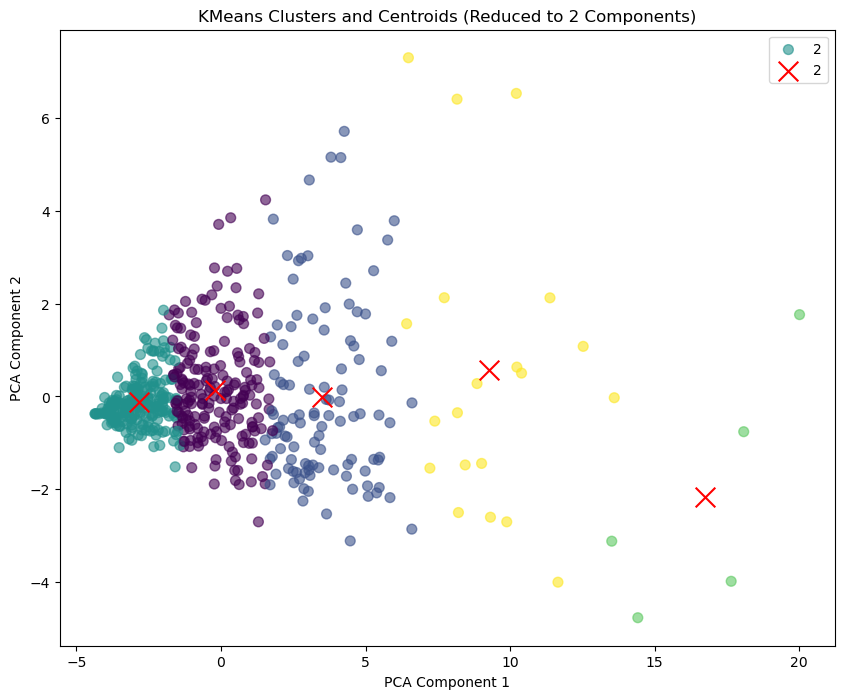

In [528]:
# Perform PCA to reduce the data to 6 components
pca = PCA(n_components=6)
scaled_df_pca_6 = pca.fit_transform(scaled_df)

# Fit KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=12345)
kmeans.fit(components_6)

# Reduce data to 2 components for visualization
pca_2d = PCA(n_components=2)
scaled_df_pca_2d = pca_2d.fit_transform(components_6)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = pca_2d.transform(kmeans.cluster_centers_)

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(scaled_df_pca_2d[:, 0], scaled_df_pca_2d[:, 1], c=labels, cmap='viridis', alpha=0.6, s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')

# Add labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clusters and Centroids (Reduced to 2 Components)')
plt.legend(labels=labels)

# Show the plot
plt.show()

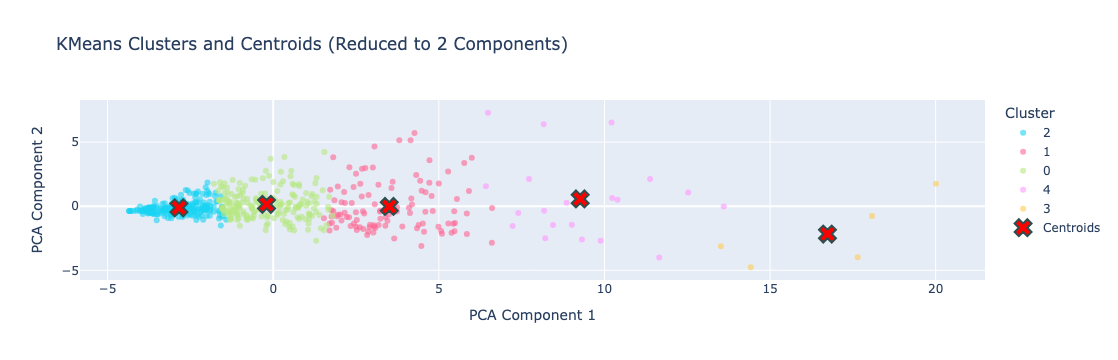

In [529]:
df_pca = pd.DataFrame(scaled_df_pca_2d, columns=['PCA Component 1', 'PCA Component 2'])
df_pca['Cluster'] = labels.astype(str)  # Add cluster labels to the DataFrame

color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange', 4: 'purple'}
    
# Create the scatter plot using Plotly Express
fig = px.scatter(
        df_pca, 
        x='PCA Component 1', 
        y='PCA Component 2', 
        color='Cluster',  # Color by cluster labels
        color_discrete_map=color_map,  # Match the 'viridis' color scale
        opacity=0.6,  # Set transparency
        title='KMeans Clusters and Centroids (Reduced to 2 Components)',
        labels={'PCA Component 1': 'PCA Component 1', 'PCA Component 2': 'PCA Component 2'},
        template=None  # Optional: use a dark theme
    )

    # Add centroids to the plot as red 'x' markers
fig.add_scatter(
        x=centroids[:, 0], 
        y=centroids[:, 1], 
        mode='markers', 
        marker=dict(color='red', size=15, symbol='x', line=dict(width=2, color='DarkSlateGrey')),
        name='Centroids', 
        hoverinfo='text', 
        text=['Centroid'] * len(centroids)
)

    # Show the plot
fig.show()

Five clusters also correspond to a five-member basketball team that is allowed on a court at any one time.

In [531]:
aggregated_df['Player Name'] = names
aggregated_df['Archetype'] = labels.astype(str)

columns = ['Player Name', 'Archetype'] + [col for col in aggregated_df.columns if col not in ['Player Name', 'Archetype']]
aggregated_df = aggregated_df[columns]

# Display the updated DataFrame
display(aggregated_df)

,Player Name,Archetype,Minutes Per Game,Field Goals Made,Field Goals Attempted,Three-Point Field Goals Made,Three-Point Field Goals Attempted,Two-Point Field Goals Made,Two-Point Field Goals Attempted,Free Throws Made,Free Throws Attempted,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points
0,A.J. Green,2,11.0,1.5,3.5,1.2,3.0,0.3,0.5,0.3,0.3,0.2,1.0,0.5,0.2,0.1,0.2,0.9,4.5
1,A.J. Lawson,2,7.4,1.3,2.9,0.3,1.2,1.0,1.7,0.4,0.5,0.3,0.9,0.5,0.2,0.1,0.3,0.5,3.2
2,AJ Griffin,2,8.6,0.9,3.1,0.5,2.0,0.4,1.2,0.1,0.1,0.1,0.8,0.3,0.1,0.1,0.4,0.3,2.4
3,Aaron Gordon,1,31.5,5.5,9.8,0.5,1.9,4.9,7.9,2.4,3.7,2.4,4.1,3.5,0.8,0.6,1.4,1.9,13.9
4,Aaron Holiday,2,16.3,2.4,5.3,1.1,2.8,1.3,2.6,0.7,0.8,0.3,1.3,1.8,0.5,0.1,0.7,1.6,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,Zach LaVine,1,34.9,6.8,15.0,2.4,6.8,4.4,8.3,3.5,4.1,0.3,4.8,3.9,0.8,0.3,2.1,2.3,19.5
540,Zavier Simpson,0,23.0,2.4,7.7,0.7,2.4,1.7,5.3,0.4,0.6,0.6,2.3,3.6,1.0,0.4,1.4,1.6,6.0
541,Zeke Nnaji,2,9.9,1.2,2.6,0.1,0.4,1.1,2.2,0.7,1.1,1.1,1.1,0.6,0.3,0.7,0.5,1.4,3.2
542,Ziaire Williams,0,20.4,2.9,7.4,1.1,3.7,1.8,3.7,1.2,1.5,0.7,2.8,1.5,0.7,0.2,1.3,1.7,8.2


Archetype
2    39.705882
0    35.661765
1    20.036765
4     3.676471
3     0.919118
Name: proportion, dtype: float64


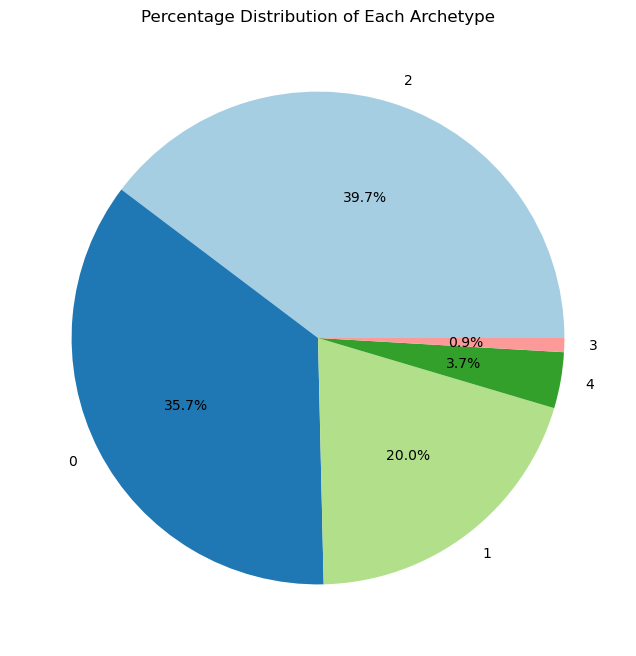

In [532]:
# Calculate the percentage of each archetype
archetype_counts = aggregated_df['Archetype'].value_counts(normalize=True) * 100

# Display the results as percentages
print(archetype_counts)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(archetype_counts, labels=archetype_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Percentage Distribution of Each Archetype')
plt.show()

In [533]:
df.head()

,Player Name,Minutes Per Game,Field Goals Made,Field Goals Attempted,Three-Point Field Goals Made,Three-Point Field Goals Attempted,Two-Point Field Goals Made,Two-Point Field Goals Attempted,Free Throws Made,Free Throws Attempted,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points
0,Precious Achiuwa,21.9,3.2,6.3,0.4,1.3,2.8,5.0,0.9,1.5,2.6,4.0,1.3,0.6,0.9,1.1,1.9,7.6
1,Precious Achiuwa,17.5,3.1,6.8,0.5,1.9,2.6,4.9,1.0,1.7,2.0,3.4,1.8,0.6,0.5,1.2,1.6,7.7
2,Precious Achiuwa,24.2,3.2,6.1,0.3,1.0,2.9,5.1,0.9,1.4,2.9,4.3,1.1,0.6,1.1,1.1,2.1,7.6
4,Ochai Agbaji,21.0,2.3,5.6,0.8,2.7,1.5,2.8,0.5,0.7,0.9,1.8,1.1,0.6,0.6,0.8,1.5,5.8
5,Ochai Agbaji,19.7,2.1,4.9,0.9,2.8,1.2,2.1,0.3,0.4,0.7,1.8,0.9,0.5,0.6,0.7,1.3,5.4


In [534]:
scaled_df['Cluster']=labels.astype(str)
scaled_df.head(10)

,Minutes Per Game,Field Goals Made,Field Goals Attempted,Three-Point Field Goals Made,Three-Point Field Goals Attempted,Two-Point Field Goals Made,Two-Point Field Goals Attempted,Free Throws Made,Free Throws Attempted,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Cluster
0,-0.690750,-0.648957,-0.634850,0.036729,-0.087118,-0.877510,-0.913641,-0.682982,-0.756342,-0.806889,-0.802027,-0.742816,-0.830783,-0.718389,-0.905395,-0.680025,-0.590866,2
1,-0.898264,-0.710114,-0.721035,-0.691303,-0.635710,-0.593895,-0.648386,-0.619838,-0.654472,-0.706810,-0.843067,-0.742816,-0.830783,-0.718389,-0.810385,-0.969261,-0.736436,2
2,-0.829092,-0.832430,-0.692306,-0.529518,-0.391891,-0.836994,-0.758909,-0.809271,-0.858211,-0.906968,-0.884108,-0.823001,-0.984715,-0.718389,-0.715374,-1.113879,-0.826018,2
3,0.490928,0.574196,0.270094,-0.529518,-0.422368,0.986249,0.722095,0.643053,0.975435,1.394855,0.470232,0.459958,0.092812,0.251829,0.234732,0.043066,0.461721,1
4,-0.385243,-0.373747,-0.376294,-0.044164,-0.148073,-0.472345,-0.449445,-0.430404,-0.501669,-0.706810,-0.678905,-0.221614,-0.368985,-0.718389,-0.430342,-0.173861,-0.355713,2
5,0.271885,0.237829,0.126452,0.602976,0.400519,-0.026663,-0.095773,0.074752,0.058612,-0.106334,-0.022255,-0.341891,0.246745,0.445872,-0.240321,1.055394,0.271360,0
6,-0.419828,-0.282011,-0.448115,-0.286841,-0.513800,-0.229246,-0.316818,-0.430404,-0.450734,-0.206413,-0.555783,-0.502261,-0.061120,-0.524346,-0.430342,-0.463097,-0.322120,2
7,-0.921321,-0.954745,-0.634850,-0.529518,-0.087118,-0.999060,-0.913641,-0.872416,-0.909145,-1.007047,-1.212433,-0.141429,-1.138647,-0.912433,-1.095417,-1.330806,-0.926797,2
8,-0.904028,-0.618378,-0.706671,-0.933980,-1.001437,-0.350796,-0.361027,-0.304115,-0.246995,1.094617,-0.432661,-0.943278,-0.984715,-0.912433,-0.525353,-0.896952,-0.646854,2
9,-1.111542,-0.985324,-0.979590,-0.691303,-0.788096,-0.918027,-0.935745,-0.872416,-0.858211,-0.906968,-0.966189,-0.823001,-1.138647,-0.912433,-0.905395,-1.041570,-0.971588,2


In [535]:
scaled_df = scaled_df.rename(columns={'Cluster': 'Archetype'})
df = scaled_df.copy()

In [536]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Minutes Per Game                   544 non-null    float64
 1   Field Goals Made                   544 non-null    float64
 2   Field Goals Attempted              544 non-null    float64
 3   Three-Point Field Goals Made       544 non-null    float64
 4   Three-Point Field Goals Attempted  544 non-null    float64
 5   Two-Point Field Goals Made         544 non-null    float64
 6   Two-Point Field Goals Attempted    544 non-null    float64
 7   Free Throws Made                   544 non-null    float64
 8   Free Throws Attempted              544 non-null    float64
 9   Offensive Rebounds                 544 non-null    float64
 10  Defensive Rebounds                 544 non-null    float64
 11  Assists                            544 non-null    float64

## Data Splitting

In [538]:
# Extract the feature variables
features = df.drop(columns=['Archetype'], axis=1)

# Extract the target variable 'Churned'
target = df['Archetype']

# Split data: 60% for training, 20% for validation, and 20% for testing
features_train, features_temp, target_train, target_temp = train_test_split(features, target, test_size=0.4, random_state=12345)

# Further split the remaining 40% into validation (20%) and test (20%) sets
features_valid, features_test, target_valid, target_test = train_test_split(features_temp, target_temp, test_size=0.5, random_state=12345)

# Print the size of each dataset
print('Training Features Size:', features_train.shape)
print()
print('Validation Features Size:', features_valid.shape)
print()
print('Test Features Size:', features_test.shape)

Training Features Size: (326, 17)

Validation Features Size: (109, 17)

Test Features Size: (109, 17)


In [547]:
# Model evaluation function
def model_eval(model, features_train, features_valid, target_train, target_valid):
    
    # Train the model on the training data
    model.fit(features_train, target_train)

    # Generate predictions on the validation set
    predictions = model.predict(features_valid)
    probabilities_test = model.predict_proba(features_valid)
   # probabilities_one_valid = probabilities_test[:, 1]

    # Calculate the AUC-ROC, Accuracy and F1 scores of the predictions
    accuracy = accuracy_score(target_valid, predictions)
    f1 = f1_score(target_valid, predictions, average='weighted')

    # Print out the AUC-ROC, Accuracy and F1 scores
    print("Accuracy:", accuracy)
    print("F1:", f1)
    print(classification_report(target_valid, predictions, zero_division=np.nan))

    return accuracy, f1

## RandomForestClassifier

In [550]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=12345)

# Set up RandomizedSearchCV for tuning the Random Forest model
rf_random_search = RandomizedSearchCV(
    rf_model, 
    param_distributions={'n_estimators': [10, 50, 100, 200], 
                         'max_features': ['sqrt', 'log2'],
                         'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_split': [2, 5, 10], 
                         'min_samples_leaf': [1, 2, 4]}, 
    n_iter=10,     
    cv=5,                        
    scoring='accuracy',
    n_jobs=-1,                      
    random_state=12345
)

# Fit the RandomizedSearchCV object to the training data
rf_random_search.fit(features_train, target_train)

print("BEST RANDOM FOREST HYPERPARAMETERS:", rf_random_search.best_params_)
print()

# Get the best Random Forest model from the search
tuned_rf_model = rf_random_search.best_estimator_

print("RANDOM FOREST STATS:")
print("--------------------")

# Evaluate the tuned Random Forest model
rf_accuracy, rf_f1 = model_eval(tuned_rf_model, features_train, features_valid, target_train, target_valid)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.



BEST RANDOM FOREST HYPERPARAMETERS: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}

RANDOM FOREST STATS:
--------------------
Accuracy: 0.9174311926605505
F1: 0.9134254125079814
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        32
           1       0.91      0.95      0.93        22
           2       0.96      0.94      0.95        53
           3        nan      0.00      0.00         1
           4       0.00      0.00      0.00         1

    accuracy                           0.92       109
   macro avg       0.69      0.56      0.56       109
weighted avg       0.92      0.92      0.91       109



In [551]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['Archetype'])
y = df['Archetype']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

# Feature importance (to see which features were most important for classification)
feature_importance = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance'])
print(feature_importance.sort_values(by='Importance', ascending=False))


Accuracy: 0.963302752293578
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.88      1.00      0.94        23
           2       1.00      0.98      0.99        48
           3       1.00      1.00      1.00         1
           4       1.00      0.60      0.75         5

    accuracy                           0.96       109
   macro avg       0.97      0.91      0.93       109
weighted avg       0.97      0.96      0.96       109

                                   Importance
Points                               0.229598
Minutes Per Game                     0.143362
Field Goals Attempted                0.122329
Field Goals Made                     0.110397
Turnovers                            0.054120
Two-Point Field Goals Attempted      0.049670
Defensive Rebounds                   0.049525
Two-Point Field Goals Made           0.043252
Personal Fouls                       0.036549
Steals                 

## XGBClassifier

In [571]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=12345)
df['Archetype'] = df['Archetype'].astype(float)
print(df.info())

# Set up RandomizedSearchCV for tuning the XGBoost model
xgb_random_search = RandomizedSearchCV(
    xgb_model, 
    param_distributions={'n_estimators': [50, 100, 200, 300],
                         'max_depth': [3, 5, 7, 10],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'subsample': [0.6, 0.8, 1.0],
                         'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.5, 1],
                         'reg_alpha': [0, 0.1, 0.5, 1],
                         'reg_lambda': [0, 0.1, 0.5, 1]}, 
    n_iter=10,                      
    cv=5,                      
    scoring='accuracy', 
    n_jobs=-1,                     
    random_state=12345,
    error_score='raise'
)

# Fit the RandomizedSearchCV object to the training data
xgb_random_search.fit(features_train, target_train)

print("BEST XGBOOST HYPERPARAMETERS:", xgb_random_search.best_params_)
print()

# Get the best XGBoost model from the search
tuned_xgb_model = xgb_random_search.best_estimator_

print("XGBOOST STATS:")
print("--------------")

# Evaluate the tuned XGBoost model
xgb_accuracy, xgb_f1 = model_eval(tuned_xgb_model, features_train, features_valid, target_train, target_valid)
df['Archetype'] = df['Archetype'].astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Minutes Per Game                   544 non-null    float64
 1   Field Goals Made                   544 non-null    float64
 2   Field Goals Attempted              544 non-null    float64
 3   Three-Point Field Goals Made       544 non-null    float64
 4   Three-Point Field Goals Attempted  544 non-null    float64
 5   Two-Point Field Goals Made         544 non-null    float64
 6   Two-Point Field Goals Attempted    544 non-null    float64
 7   Free Throws Made                   544 non-null    float64
 8   Free Throws Attempted              544 non-null    float64
 9   Offensive Rebounds                 544 non-null    float64
 10  Defensive Rebounds                 544 non-null    float64
 11  Assists                            544 non-null    float64

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.



ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got ['0' '1' '2' '3' '4']